<a href="https://colab.research.google.com/github/Cyber-Vadok/TESI/blob/master/Supervised_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#IMPORTO LIBRERIE
import pandas as pd

In [33]:
df = pd.read_csv('IF_df_scores.csv')
df.shape

(90960, 18)

In [34]:
df = df.drop(columns='Unnamed: 0')
df.head()

,customerId,timestamp,country,amount,businessName,userAgent_isPc,userAgent_browserFamily,userAgent_osFamily,IBAN_countryCode,IBAN_bankCode,SIA,CAP,SAE,RAE,companyType,scores,label
0,93000801,2021-09-15 16:13:35.147,Italy,150.00,c7543b6f04850eae288aa52783b33363,1,Firefox,Windows,IT,5856,CLFUY,33077,492,630,SAS,0.153537,0
1,93000801,2021-08-24 10:34:24.487,Greece,3200.00,c7543b6f04850eae288aa52783b33363,1,Firefox,Windows,IT,5856,CLFUY,33077,492,630,SAS,0.127344,0
2,93000801,2021-09-14 16:21:43.33,Italy,8350.00,c7543b6f04850eae288aa52783b33363,1,Firefox,Windows,IT,5856,CLFUY,33077,492,630,SAS,0.136098,0
3,93001001,2021-06-30 09:07:16.733,Italy,500.00,3f241dfcc38064261fec0f303c2784e5,1,Chrome,Windows,IT,2008,CEFGV,31039,430,505,SRL,0.279952,0
4,93001001,2021-07-12 16:36:02.857,Italy,1895.68,a5d1eaffa8e325d370665f43624339a1,1,Chrome,Windows,IT,3069,CEFGV,31039,430,505,SRL,0.285561,0


In [35]:
df = df.sample(frac=1).reset_index()
df.head()

,index,customerId,timestamp,country,amount,businessName,userAgent_isPc,userAgent_browserFamily,userAgent_osFamily,IBAN_countryCode,IBAN_bankCode,SIA,CAP,SAE,RAE,companyType,scores,label
0,32304,33933326,2021-07-28 17:38:41.127,Italy,616.14,6eb9f54be62de7cecc6c171b8c4baa8d,1,Chrome,Windows,IT,1030,B169K,30030,430,505,SRL,0.250989,0
1,76545,8713084501,2021-07-13 09:11:21.233,Italy,1646.00,f1b8d4bb4443ca646713d8cb02f2c307,1,Chrome,Windows,IT,2008,B5QC4,36022,482,505,SRL,0.267832,0
2,1,93000801,2021-08-24 10:34:24.487,Greece,3200.00,c7543b6f04850eae288aa52783b33363,1,Firefox,Windows,IT,5856,CLFUY,33077,492,630,SAS,0.127344,0
3,28320,2814396501,2021-06-01 12:04:29.14,Italy,467.38,99f651dde67cce8286003fe126bc8d8f,1,Edge,Windows,IT,3069,12V26,30175,430,617,SRL,0.246680,0
4,12040,13935826,2021-08-26 15:52:26.967,Italy,6100.00,493df487bfbfdf931592d554cefd43b9,1,Chrome,Windows,IT,8590,CSLGX,36063,430,314,SRL,0.216379,0


In [36]:
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)

In [37]:
tf_Train = tfdf.keras.pd_dataframe_to_tf_dataset(training_data, label="label")
tf_Test = tfdf.keras.pd_dataframe_to_tf_dataset(testing_data, label="label")

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core_inference.py:873: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


In [5]:
!pip3 install tensorflow_decision_forests --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.0 MB 3.7 MB/s 
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 5.9 MB 43.8 MB/s 
     |████████████████████████████████| 1.7 MB 51.3 MB/s 
     |████████████████████████████████| 438 kB 54.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninst

In [39]:
import tensorflow_decision_forests as tfdf
#tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(tf_Train, label="label")
model = tfdf.keras.RandomForestModel()
model.fit(tf_Train)
print(model.summary())

Use /tmp/tmpp9qm9tlg as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.120555. Found 72768 examples.
Training model...
Model trained in 0:02:50.411805
Compiling model...
Model compiled.
Model: "random_forest_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (17):
	CAP
	IBAN_bankCode
	IBAN_countryCode
	RAE
	SAE
	SIA
	amount
	businessName
	companyType
	country
	customerId
	index
	scores
	timestamp
	userAgent_browserFamily
	userAgent_isPc
	userAgent_osFamily

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.                 "__LABEL"  2.607442 ################
    2.               "timestamp"  2.606160 ###############
    3.            "businessName"  2

In [40]:
evaluation = model.evaluate(tf_Test, return_dict=True)

19/19 [==============================] - 1s 18ms/step - loss: 0.0000e+00


In [41]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

In [42]:
model.make_inspector().variable_importances()


{'SUM_SCORE': [("scores" (1; #12), 96019.41438211627),
  ("userAgent_browserFamily" (4; #14), 33018.0101804208),
  ("userAgent_osFamily" (4; #16), 19094.0985316317),
  ("userAgent_isPc" (1; #15), 9980.79357357003),
  ("SIA" (4; #5), 3192.1110204970537),
  ("IBAN_countryCode" (4; #2), 1953.662502905012),
  ("amount" (1; #6), 1538.791976926841),
  ("companyType" (4; #8), 1281.6320397382842),
  ("IBAN_bankCode" (4; #1), 1167.5330814604022),
  ("country" (4; #9), 902.6744160218586),
  ("SAE" (1; #4), 580.092278174845),
  ("customerId" (1; #10), 326.6809131309492),
  ("RAE" (1; #3), 259.040331116983),
  ("index" (1; #11), 199.65899408024052),
  ("CAP" (1; #0), 147.04955591131693),
  ("businessName" (4; #7), 5.7259705401957035),
  ("timestamp" (4; #13), 2.730147368274629)],
 'NUM_AS_ROOT': [("scores" (1; #12), 100.0),
  ("userAgent_browserFamily" (4; #14), 75.0),
  ("userAgent_osFamily" (4; #16), 44.0),
  ("userAgent_isPc" (1; #15), 31.0),
  ("SIA" (4; #5), 19.0),
  ("companyType" (4; #8), 1

In [43]:
model.make_inspector().evaluation()


Evaluation(num_examples=72768, accuracy=0.9999725153913809, loss=0.00017244699553285725, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

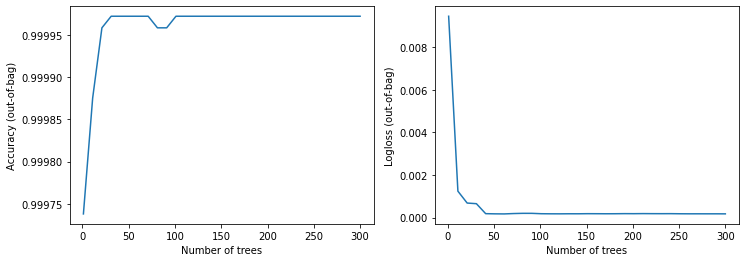

In [44]:
import matplotlib.pyplot as plt

logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()